In [1]:
import os
import json
import h5py
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = h5py.File("../datasets/fcnet_tabular_benchmarks/fcnet_naval_propulsion_data.hdf5", 'r')

In [24]:
configs = []
for k_str in data.keys():
    config = json.loads(k_str)
    config["final_test_error"] = data[k_str]["final_test_error"]
    configs.append(config)

KeyboardInterrupt: 

In [27]:
configs[0]

{'activation_fn_1': 'relu',
 'activation_fn_2': 'relu',
 'batch_size': 16,
 'dropout_1': 0.0,
 'dropout_2': 0.0,
 'init_lr': 0.0005,
 'lr_schedule': 'const',
 'n_units_1': 128,
 'n_units_2': 128,
 'final_test_error': <HDF5 dataset "final_test_error": shape (4,), type "<f4">}

In [25]:
df = pd.DataFrame(configs)
df

,activation_fn_1,activation_fn_2,batch_size,dropout_1,dropout_2,init_lr,lr_schedule,n_units_1,n_units_2,final_test_error
0,relu,relu,16,0.0,0.0,0.0005,const,128,128,"[0.0008647902, 0.0064044874, 0.004016637, 0.00..."
1,relu,relu,16,0.0,0.0,0.0005,const,128,16,"[0.0020905803, 0.00096995523, 0.0034522826, 0...."
2,relu,relu,16,0.0,0.0,0.0005,const,128,256,"[0.00024793012, 0.005091055, 0.00031077827, 0...."
3,relu,relu,16,0.0,0.0,0.0005,const,128,32,"[0.00033905782, 0.0049930927, 0.0013003553, 0...."
4,relu,relu,16,0.0,0.0,0.0005,const,128,512,"[0.00020727521, 0.00074864633, 0.0014476927, 0..."
...,...,...,...,...,...,...,...,...,...,...
2607,relu,relu,16,0.6,0.0,0.0005,const,256,32,"[0.017523862, 0.015978323, 0.019496499, 0.0164..."
2608,relu,relu,16,0.6,0.0,0.0005,const,256,512,"[0.12545918, 0.15991618, 0.12295618, 0.15271117]"
2609,relu,relu,16,0.6,0.0,0.0005,const,256,64,"[0.022644956, 0.027180666, 0.026513621, 0.0271..."
2610,relu,relu,16,0.6,0.0,0.0005,const,32,128,"[0.6663799, 0.54217863, 0.528649, 0.57603693]"


In [5]:
data[k_str].keys()

<KeysViewHDF5 ['final_test_error', 'n_params', 'runtime', 'train_loss', 'train_mse', 'valid_loss', 'valid_mse']>

In [6]:
data[k_str]['final_test_error']

<HDF5 dataset "final_test_error": shape (4,), type "<f4">

In [7]:
data[k_str]['runtime']

<HDF5 dataset "runtime": shape (4,), type "<f4">

In [8]:
data[k_str]['train_loss']

<HDF5 dataset "train_loss": shape (4, 100), type "<f4">

In [9]:
data[k_str]['train_mse']

<HDF5 dataset "train_mse": shape (4, 100), type "<f4">

In [10]:
data[k_str]['valid_loss']

<HDF5 dataset "valid_loss": shape (4, 100), type "<f4">

In [11]:
data[k_str]['valid_mse']

<HDF5 dataset "valid_mse": shape (4, 100), type "<f4">

In [12]:
# data = df.stack()
# data.name = "test"
# data.reset_index()

In [13]:
# g = sns.pairplot(df)

In [14]:
d = pd.DataFrame(data[k_str]['valid_mse'])
d.index.name = "seed"
d.columns.name = "epoch"
s = d.stack()
s.name = "valid_mse"
df = s.reset_index()
df

,seed,epoch,valid_mse
0,0,0,1.734614
1,0,1,2.113721
2,0,2,1.350231
3,0,3,4.874994
4,0,4,1.077193
...,...,...,...
395,3,95,1.009997
396,3,96,1.009969
397,3,97,1.008540
398,3,98,1.007924


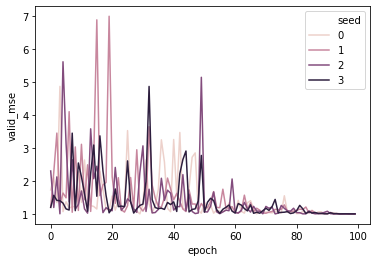

In [21]:
fig, ax = plt.subplots()

sns.lineplot(x='epoch', y='valid_mse', hue="seed", data=df, ax=ax)

plt.show()

In [22]:
lst = [dict(foo=1, bar=[[3, 7, 6], [3, 7, 1]]), dict(foo=2, bar=[4, 1])]
lst

[{'foo': 1, 'bar': [[3, 7, 6], [3, 7, 1]]}, {'foo': 2, 'bar': [4, 1]}]

In [23]:
pd.DataFrame(lst[0])

,foo,bar
0,1,"[3, 7, 6]"
1,1,"[3, 7, 1]"
